<a href="https://colab.research.google.com/github/dvoils/neural-network-experiments/blob/main/energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Hopfield proposed that certain computational properties useful to organisms and computers can emerge **collectively** from large assemblies of simple interacting units (neurons). Instead of requiring complex circuitry, emergent computation arises spontaneously, analogous to physical systems such as magnetic domains or fluid vortices. This paper presents a model that exhibits **content-addressable memory**, error correction, generalization, and categorization---all emerging from dynamics rather than programmed instruction.


## Content-Addressable Memory and Dynamics

Let a memory be represented as a point $\mathbf{X} \in \mathbb{R}^N$. In certain physical systems (e.g., Ising models), dynamics defined by gradient descent in energy space drive states toward stable attractors:

$$
\frac{d\mathbf{X}}{dt} = -\nabla E(\mathbf{X})
$$

This system acts as a **content-addressable memory** if every partial or noisy input state $\mathbf{X}' \approx \mathbf{X}_a$ flows toward a stable point $\mathbf{X}_a$. Hopfield demonstrates that such dynamics can recover full memories from fragments.

## The Hopfield Model

Each of the $N$ neurons is binary:

$V_i \in \{0, 1\} \quad \text{or equivalently} \quad s_i = 2V_i - 1 \in \{-1, +1\}$

Neurons update asynchronously using the rule:

$$
V_i \leftarrow
\begin{cases}
1 & \text{if } \sum_j T_{ij} V_j > U_i \\
0 & \text{otherwise}
\end{cases}
$$

where $T_{ij}$ is the synaptic strength, and $U_i$ is the threshold (often taken to be 0).


## Hebbian Learning Rule

To store a set of binary patterns $\{\mathbf{V}^s\}_{s=1}^n$, Hopfield applies the Hebbian learning rule:

$$
T_{ij} = \sum_{s=1}^{n} (2V_i^s - 1)(2V_j^s - 1), \quad T_{ii} = 0
$$

This rule causes each stored pattern $\mathbf{V}^s$ to become a local minimum (attractor) in energy space:

$$
E = -\frac{1}{2} \sum_{i \neq j} T_{ij} V_i V_j
$$

Updating any neuron causes the energy to decrease:

$$
\Delta E = -\Delta V_i \sum_j T_{ij} V_j
$$

Thus, asynchronous updates guarantee convergence to a stable state.

## Capacity and Error Correction

* For $N$ neurons, the network can stably store about $0.15N$ random patterns before retrieval degrades.
* Noise in the system is modeled as Gaussian, leading to error probability:

$$
P = \frac{1}{\sqrt{2\pi}} \int_x^\infty e^{-t^2/2} dt
$$

* Simulations confirm recall is accurate for low pattern count and degrades as $n$ approaches $0.15N$.

## Categorization and Familiarity

* **Generalization**: The system categorizes ambiguous inputs by converging to the closest memory.
* **Familiarity**: High activation rates during convergence can indicate whether a pattern is familiar.
* **Categorical recall**: Close patterns may collapse into a shared attractor (useful for pattern completion).

## Extensions and Properties

* **Clipped Weights**: Even if $T_{ij} \in \{-1, 0, +1\}$, performance only degrades slightly.
* **Asymmetry**: Even non-symmetric $T_{ij} \neq T_{ji}$ can yield metastable attractors.
* **Forgetting**: Saturating synaptic strength (e.g., $T_{ij} \in [-3, 3]$) introduces natural forgetting.
* **Sequence Recall**: Adding asymmetric terms can allow short sequences $V^1 \to V^2 \to V^3 \to \dots$.

## Biological Plausibility

* Real neurons exhibit firing rates that approximate binary thresholds.
* Hebbian learning ($\Delta T_{ij} \propto V_i V_j$) is biologically plausible.
* Delay and stochasticity are modeled via asynchronous updates.


## Conclusions

Hopfield demonstrates that associative memory and pattern completion can emerge as collective properties of simple neuron-like elements. These results suggest:

1. Neural computation does not require complex sequential logic.
2. Distributed systems can perform robust parallel computation.
3. The brain may exploit such physical dynamics for memory, recognition, and decision-making.
4. Hardware implementations (e.g., neuromorphic chips) could benefit from these ideas.

**Key Concepts**: attractor dynamics, energy minimization, Hebbian learning, content-addressable memory, neural computation, error correction, categorization.

**Citations**: J.J. Hopfield, PNAS, Vol. 79, pp. 2554–2558, 1982.


# 1. Models of Neural Networks

*A Statistical Mechanics Approach to Associative Memory*

## 1.1 Binary-State Neurons and Spin Variables

In this section, Amit, Gutfreund, and Sompolinsky present a powerful analogy between neural networks and disordered spin systems in statistical mechanics. This framework formalizes the behavior of networks such as the Hopfield model and the earlier Little model by treating each neuron as a binary unit. Neurons are modeled as Ising-like spins that can be in one of two discrete states: $S_i = +1$ indicates that a neuron is firing (active), and $S_i = -1$ indicates that it is not firing (inactive). These binary states correspond to the presence or absence of electrochemical activity over short time intervals, typically on the order of milliseconds.

The state of the entire network at a given time $t$, associated with a particular memory pattern labeled by $\alpha$, is represented by the vector:

$$
| \alpha, t \rangle = | S_1^\alpha, S_2^\alpha, \ldots, S_N^\alpha; t \rangle
\tag{1.1}
$$

This vector captures the configuration of all $N$ neurons, where each $S_i^\alpha$ is the state of the $i$-th neuron in memory pattern $\alpha$. The full network state exists in a $2^N$-dimensional binary phase space, with each configuration representing a potential microstate of the system. These memory states form the foundational units of computation and recall in the model.

## 1.2 Synaptic Connectivity and Postsynaptic Potentials

Neurons are coupled through synaptic junctions with connection strengths $J_{ij}$, which determine the influence of neuron $j$ on neuron $i$. These interactions may be excitatory (positive $J_{ij}$) or inhibitory (negative $J_{ij}$). During a short integration period, each neuron aggregates input from other neurons. The total **postsynaptic potential** $V_i$ received by neuron $i$ is defined as:

$$
V_i = \sum_j J_{ij} (S_j + 1)
\tag{1.2}
$$

This formulation maps the spin values $S_j \in \{-1, +1\}$ into the domain $\{0, 2\}$, ensuring that only active neurons contribute to the synaptic sum. Specifically, an inactive presynaptic neuron ($S_j = -1$) contributes nothing to $V_i$, while an active one ($S_j = +1$) contributes $2J_{ij}$. This encoding preserves biological plausibility, as silent neurons do not influence postsynaptic potentials.

## 1.3 Thresholding and Neuronal Stability

Once the total potential $V_i$ is computed, it is compared to a threshold value $U_i$. The difference $h_i = V_i - U_i$ is known as the **molecular field** or local input field. A neuron is said to be stable when its state $S_i$ is aligned with its molecular field. This condition is expressed as:

$$
S_i h_i = S_i (V_i - U_i) > 0
\tag{1.3}
$$

If this inequality is satisfied, the neuron is energetically stable and will not change state. If the inequality is violated, the neuron is misaligned with its input field and will flip its state in the next update. This condition ensures that the network only evolves through **state transitions that reduce the system's energy**, pushing the system toward more stable configurations.

## 1.4 The Hamiltonian and Energy Descent

The global behavior of the network is governed by a scalar energy function, known as the **Hamiltonian**. It measures the total energy of the system in a given configuration. The Hamiltonian is defined as:

$$
H = -\sum_i h_i S_i = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j
\tag{1.4}
$$

The first form of the Hamiltonian expresses the alignment between each neuron and its local input field. The second form arises under the assumption that the synaptic weights are symmetric, $J_{ij} = J_{ji}$, and avoids double-counting pairwise interactions with a factor of $\frac{1}{2}$. When threshold potentials are chosen such that $U_i = \sum_j J_{ij}$, any constant external field contributions are eliminated, and the energy is entirely determined by inter-neuronal interactions.

This energy function serves as a Lyapunov function for the system: the dynamics defined by the update rule in Equation (1.3) guarantee that each neuron flip reduces or leaves unchanged the value of $H$. Therefore, the system follows a path of **monotonic energy descent** and converges to a local minimum of the Hamiltonian. These minima correspond to **stable memory configurations**.

## 1.5 Memory Storage via Hebbian Learning

The storage of memory patterns in the network is achieved by properly selecting the synaptic weights $J_{ij}$. Adopt a **Hebbian learning rule**, inspired by the principle that co-activated neurons should strengthen their mutual connection. Given a set of $p$ memory patterns $\{ \boldsymbol{\xi}^\mu \}_{\mu=1}^p$, the synaptic weights are defined as:

$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^p \xi_i^\mu \xi_j^\mu, \quad i \ne j
\tag{1.5}
$$

Each pattern $\xi^\mu \in \{-1, +1\}^N$ represents a full binary configuration of the network and is assumed to be randomly sampled. The couplings $J_{ij}$ encode correlations between neurons across all stored patterns. The diagonal elements $J_{ii}$ are set to zero, reflecting the absence of self-coupling. This formulation ensures that each pattern $\boldsymbol{\xi}^\mu$ becomes a **stable fixed point** of the network dynamics — that is, a local minimum of the Hamiltonian to which the system can converge during recall.

## 1.6 Summary

This is the theoretical and physiological foundation for modeling neural networks as spin-glass systems. Each neuron is represented as a binary spin, and its interaction with other neurons is mediated by synaptic couplings that are symmetric and determined through Hebbian learning. The dynamics of the system are governed by an energy function, which ensures convergence toward stable configurations that represent memorized patterns. In this way, the network performs associative memory by evolving toward attractors in a rugged energy landscape — a concept borrowed directly from disordered systems in statistical mechanics.


# 2D Ising Model Simulation Using the Metropolis Algorithm

## Overview

The two-dimensional Ising model describes a lattice of binary spin variables $S_{i,j} \in \{-1, +1\}$, where each spin occupies a site on a square lattice and interacts with its nearest neighbors. This model captures fundamental principles of cooperative behavior and phase transitions in statistical mechanics. Each spin contributes to the overall system energy based on its alignment with neighboring spins. Thermal fluctuations, controlled by a temperature parameter $T$, introduce randomness into the spin dynamics. The system evolves over time toward thermal equilibrium by following stochastic update rules grounded in statistical physics.

## Lattice Initialization

The lattice comprises $L \times L$ sites. Each site initially receives a random spin value of either $+1$ or $-1$, establishing a high-entropy configuration. This initialization emulates the disorder present at high temperature, where thermal noise dominates spin alignment. A high-temperature system lacks coherent structure, so this randomized initial state represents an appropriate starting point for studying emergent order.

## Neighbor Interactions and Energy

Each spin interacts only with its four nearest neighbors: one above, one below, one to the left, and one to the right. Periodic boundary conditions ensure that edge effects do not dominate the behavior of the lattice. The energy of the system derives from the Ising Hamiltonian:

$$
H = -J \sum_{\langle i,j \rangle} S_i S_j
$$

Here, the summation runs over all nearest-neighbor pairs $\langle i,j \rangle$, and the constant $J > 0$ promotes alignment between neighboring spins. The model sets $J = 1$ for simplicity. This energy function penalizes misaligned spins and rewards aligned ones, creating a landscape where energetically favorable configurations correspond to clusters of uniform spin orientation.

## Metropolis Update Rule

The simulation advances the spin configuration using the Metropolis algorithm. At each step, the algorithm selects a random spin $S_{i,j}$ and evaluates the change in energy $\Delta E$ associated with flipping the spin. The local contribution to the energy change is computed as:

$$
\Delta E = 2 S_{i,j} \sum_{n \in \text{neighbors}} S_n
$$

If the flip reduces the energy ($\Delta E \leq 0$), the spin flips. Otherwise, the algorithm flips the spin with probability $\exp(-\Delta E / T)$, where $T$ denotes the system temperature. This probabilistic rule ensures detailed balance and drives the system toward a Boltzmann-distributed equilibrium. The update process proceeds asynchronously, updating individual spins one at a time in a randomized order.

## Simulation and Visualization

The simulation performs many such asynchronous updates, sweeping across the lattice multiple times. At regular intervals, it records snapshots of the current spin configuration. These snapshots allow direct visualization of the model’s evolution. Over time, local clusters emerge, grow, and sometimes coalesce, depending on the temperature. At high temperatures, the system remains disordered. At low temperatures, the lattice evolves toward an ordered state characterized by large domains of aligned spins.

Visualizations depict each spin state with color: typically blue for $S = -1$ and red for $S = +1$. These representations reveal how initially random patterns give way to ordered domains, illustrating the spontaneous emergence of structure in thermodynamic systems.

## Physical Interpretation

The Metropolis Ising simulation exemplifies how simple local rules generate rich global behavior. The lattice evolves toward low-energy states, but thermal noise prevents it from becoming trapped in trivial configurations. By tuning the temperature $T$, the system exhibits qualitatively different dynamics. At high $T$, thermal agitation dominates and suppresses large-scale order. At low $T$, spin alignment becomes energetically dominant, and domains form. Near a critical temperature $T_c$, the system undergoes a second-order phase transition, exhibiting long-range correlations and power-law behavior.

This behavior provides a valuable pedagogical and computational bridge between statistical mechanics and neural networks. Although the Ising model differs structurally from the fully connected Hopfield-type networks studied by Amit, Gutfreund, and Sompolinsky, it retains a deep conceptual connection. Both models describe discrete binary systems governed by energy functions and capable of reaching stable, low-energy configurations through local updates.

## Conclusion

The 2D Ising model, driven by the Metropolis algorithm, serves as a foundational example of how local interactions and probabilistic dynamics can give rise to complex global phenomena. This simulation offers a clear, visual way to explore the mathematical structure and physical intuition behind phase transitions, stability, and emergent order. These properties also inform models of memory and computation in disordered systems and provide valuable insights when analyzing neural network dynamics through a statistical mechanics lens.


Step     0: Energy = -5000.00, Magnetization = -0.009
Step     5: Energy = -9528.00, Magnetization = -0.029
Step    10: Energy = -10392.00, Magnetization = -0.037
Step    15: Energy = -10852.00, Magnetization = -0.047
Step    20: Energy = -11116.00, Magnetization = -0.049
Step    25: Energy = -11224.00, Magnetization = -0.042
Step    30: Energy = -11356.00, Magnetization = -0.039
Step    35: Energy = -11508.00, Magnetization = -0.047
Step    40: Energy = -11548.00, Magnetization = -0.037
Step    45: Energy = -11644.00, Magnetization = -0.037
Step    50: Energy = -11724.00, Magnetization = -0.063
Step    55: Energy = -11776.00, Magnetization = -0.051
Step    60: Energy = -11872.00, Magnetization = -0.064
Step    65: Energy = -11896.00, Magnetization = -0.052
Step    70: Energy = -11948.00, Magnetization = -0.040
Step    75: Energy = -12036.00, Magnetization = -0.052
Step    80: Energy = -12024.00, Magnetization = -0.054
Step    85: Energy = -12052.00, Magnetization = -0.053
Step    90: 

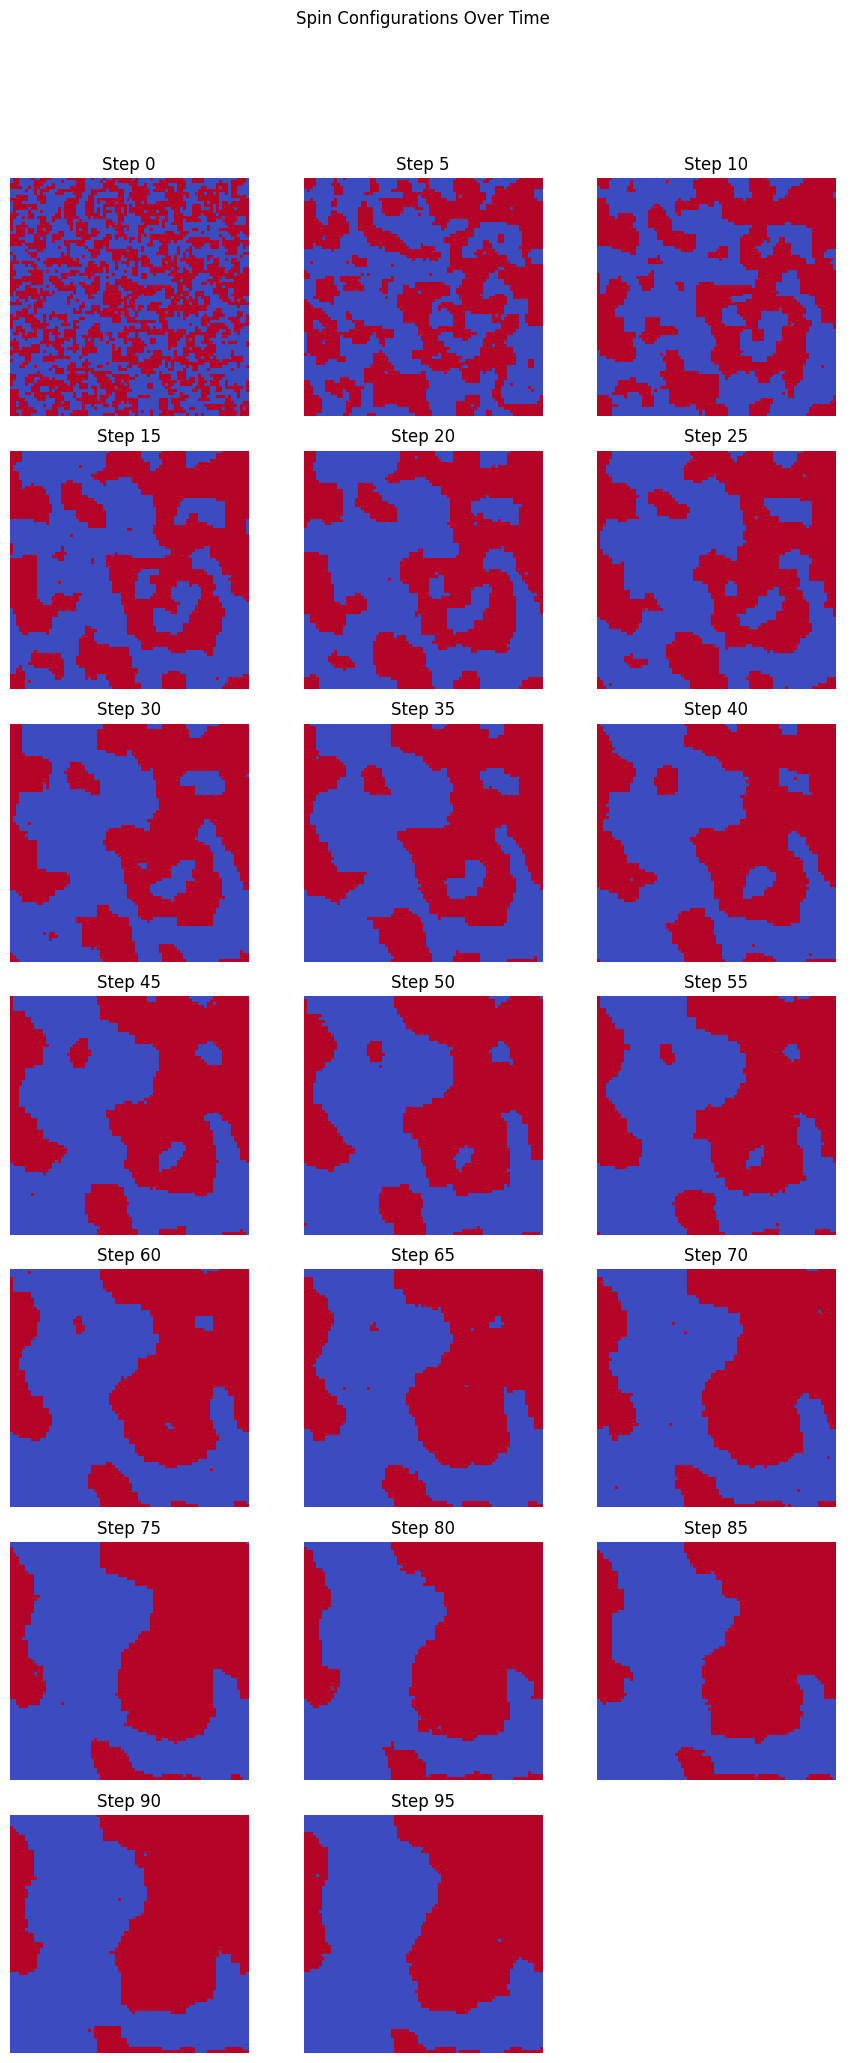

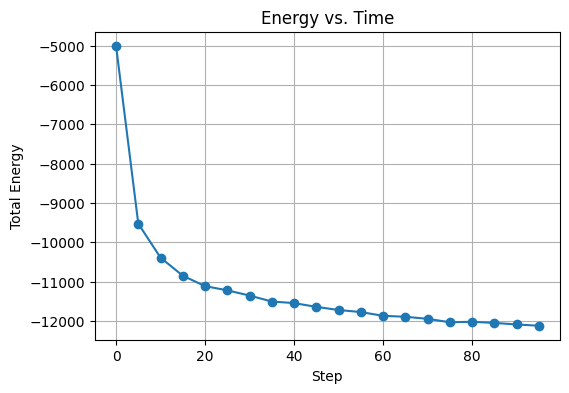

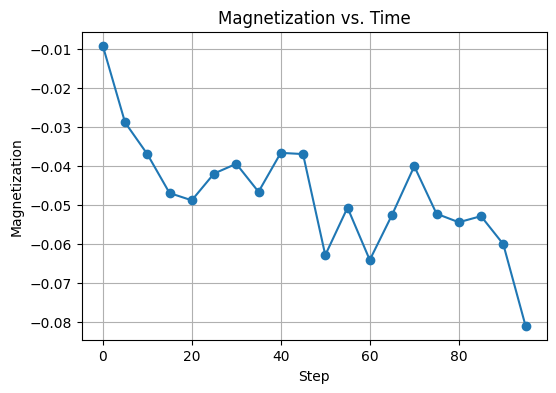

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameters
L = 80                 # Lattice size (L x L)
T = 1                  # Temperature
steps = 100            # Total number of Metropolis steps
plot_every = 5         # Interval for tracking and visualization
snapshots_per_row = 3  # Number of plots per row

# Initialize lattice
spins = np.random.choice([-1, 1], size=(L, L))

# Periodic boundary conditions
def get_neighbors(i, j):
    return [
        ((i - 1) % L, j),
        ((i + 1) % L, j),
        (i, (j - 1) % L),
        (i, (j + 1) % L)
    ]

# Compute total energy
def total_energy(spins):
    E = 0
    for i in range(L):
        for j in range(L):
            s = spins[i, j]
            E -= s * (spins[(i + 1) % L, j] + spins[i, (j + 1) % L])  # avoid double-counting
    return E

# Compute magnetization
def magnetization(spins):
    return np.sum(spins) / spins.size

# Metropolis update step
def metropolis_step(spins, T):
    for _ in range(L * L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        s = spins[i, j]
        neighbor_sum = sum(spins[ni, nj] for ni, nj in get_neighbors(i, j))
        dE = 2 * s * neighbor_sum
        if dE <= 0 or np.random.rand() < np.exp(-dE / T):
            spins[i, j] = -s

# Storage
energies = []
magnetizations = []
snapshots = []

# Simulation
for step in range(steps):
    metropolis_step(spins, T)
    if step % plot_every == 0:
        E = total_energy(spins)
        M = magnetization(spins)
        energies.append(E)
        magnetizations.append(M)
        snapshots.append(spins.copy())
        print(f"Step {step:5d}: Energy = {E:8.2f}, Magnetization = {M:.3f}")

# Plot spin snapshots in multiple rows
num_snapshots = len(snapshots)
rows = math.ceil(num_snapshots / snapshots_per_row)

fig, axes = plt.subplots(rows, snapshots_per_row, figsize=(3 * snapshots_per_row, 3 * rows))
for idx, snap in enumerate(snapshots):
    r = idx // snapshots_per_row
    c = idx % snapshots_per_row
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.imshow(snap, cmap="coolwarm", interpolation="nearest")
    ax.set_title(f"Step {idx * plot_every}")
    ax.axis("off")

# Hide any unused axes
for idx in range(num_snapshots, rows * snapshots_per_row):
    r = idx // snapshots_per_row
    c = idx % snapshots_per_row
    ax = axes[r, c] if rows > 1 else axes[c]
    ax.axis("off")

plt.suptitle("Spin Configurations Over Time")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Plot energy
plt.figure(figsize=(6, 4))
plt.plot(np.arange(0, steps, plot_every), energies, label="Energy", marker='o')
plt.xlabel("Step")
plt.ylabel("Total Energy")
plt.title("Energy vs. Time")
plt.grid(True)
plt.show()

# Plot magnetization
plt.figure(figsize=(6, 4))
plt.plot(np.arange(0, steps, plot_every), magnetizations, label="Magnetization", marker='o')
plt.xlabel("Step")
plt.ylabel("Magnetization")
plt.title("Magnetization vs. Time")
plt.grid(True)
plt.show()


# 2. The Generalized Hopfield Model and the Little Model

This section deepens the analysis of neural dynamics by focusing on two specific models: the Hopfield model and the Little model. Both models aim to capture the collective behavior of networks composed of binary-state neurons and are analyzed using tools from the statistical mechanics of disordered systems. These models are explored in the thermodynamic limit, where the number of neurons $N \to \infty$, but the number of stored memory patterns $p$ remains finite.

The key insight presented is that both the Hopfield and Little models are governed by the thermodynamics of infinite-range Ising spin-glass Hamiltonians. Despite differences in update mechanisms, these models share identical equilibrium behavior below a critical temperature $T_c$. Specifically, when the temperature drops below this transition point, both models exhibit a structured set of stable and metastable states. The most prominent among these are the $2p$ **Mattis ground states**, each fully aligned (or anti-aligned) with one of the stored patterns.

Moreover, below approximately $0.46 T_c$, additional metastable states emerge. These correspond to mixtures of the stored memory patterns and possess dynamic stability. These mixed states reflect the complex geometry of the energy landscape introduced by the competition between multiple embedded patterns. The section also generalizes the analysis to cases where the stored patterns are drawn from more complex or non-random distributions, highlighting how the stability structure depends on memory statistics.

## 2.1 Stochastic Dynamics and the Gibbs Distribution

At zero temperature ($T = 0$), the Hopfield model operates using a purely deterministic update rule: each spin that is misaligned with its molecular field flips its state, and the system monotonically descends in energy. This dynamic leads to convergence toward local minima of the Hamiltonian $H$, as defined earlier. To account for thermal noise and stochasticity in biological systems, the model is extended to finite temperature $T = 1/\beta$, resulting in a **generalized Hopfield model** governed by **Glauber dynamics**.

In this finite-temperature setting, the probability of a network being in configuration $\{S\}$ is given by the **Gibbs distribution**:

$$
P\{S\} \propto \exp\left( -\beta H\{S\} \right)
\tag{2.1}
$$

This expression implies that states with lower energy are exponentially more probable, but all configurations can, in principle, occur due to thermal fluctuations. The introduction of temperature allows the model to explore a broader portion of the configuration space and escape shallow local minima. However, it's important to note that **stability under single-spin flips** is no longer sufficient to guarantee dynamic stability in this regime.

## 2.2 Probabilistic Updates in the Little Model

Unlike the Hopfield model, which updates one spin at a time (asynchronously), the **Little model** uses **synchronous updates**, where all spins are updated simultaneously at each discrete time step. The probability that the $i$-th spin takes a new value $S_i'$ at time $t + \delta t$, given the current state of the network $\{\overline{S}_l\}$ at time $t$, is defined by:

$$
P(S_i') = \frac{ \exp(-\beta S_i' h_i) }{ \exp(-\beta S_i' h_i) + \exp(+\beta S_i' h_i) }
\tag{2.2}
$$

Here, $h_i = V_i - U_i = \sum_j J_{ij} S_j$ is the molecular field acting on neuron $i$, as defined previously. This equation arises naturally from Glauber-type dynamics and describes the likelihood of a neuron adopting a particular state based on its input field and the system temperature.

## 2.3 Transition Matrix and System-Wide Dynamics

The **transition probability matrix** $W$ defines the likelihood of transitioning from one global network state $|\alpha, t\rangle$ to another $|\beta, t + \delta t \rangle$. In the Little model, since all spins are updated simultaneously and independently, the total transition probability is given by the product of individual spin update probabilities:

$$
\langle \beta | W | \alpha \rangle = \prod_{l=1}^{N} \left[ \frac{1}{2} e^{-\beta h_l^\alpha S_l^\beta} \, \text{sech}(\beta h_l^\alpha S_l^\beta) \right]
\tag{2.3}
$$

This formulation captures the fact that the entire network evaluates and potentially updates its configuration in parallel at each time step. As a result, multiple spin flips may occur simultaneously, enabling rapid transitions across the energy landscape.

## 2.4 Effective Hamiltonian and Stationary Behavior

A crucial result shown by Peretto is that when the couplings $J_{ij}$ are symmetric, the stochastic dynamics described by the Little model satisfy the condition of **detailed balance**. This ensures that the system's long-term behavior can be described by a stationary distribution that resembles a Boltzmann distribution but with an **effective Hamiltonian** $\overline{H}$, given by:

$$
\overline{H} = -\frac{1}{\beta} \sum_i \ln \left[ 2 \cosh\left( \beta \sum_j J_{ij} S_j \right) \right]
\tag{2.4}
$$

This form of the energy function encapsulates the probabilistic nature of the synchronous update rule. It differs from the original Hamiltonian in that it smooths over rapid fluctuations in the energy landscape, making it suitable for describing equilibrium properties under collective spin dynamics.

Although the synchronous dynamics of the Little model may seem fundamentally different from the asynchronous dynamics of the Hopfield model, both converge to similar thermodynamic behavior under symmetric couplings and in the absence of external fields. Moreover, real biological networks are likely to operate somewhere between these two extremes, incorporating features of both update mechanisms.

Importantly, for networks with Hebbian couplings as defined in Equation (1.5), the Little model does not become trapped in indefinite oscillations or limit cycles. Instead, it reliably converges to aligned, stable states, enabling successful memory retrieval even under synchronous update schemes.

## 2.5 Summary

This provides a rigorous examination of neural network dynamics from both deterministic and stochastic perspectives. By extending the Hopfield model to finite temperature and comparing it with the synchronously-updated Little model, both systems exhibit rich and similar energy landscapes characterized by stable memory attractors. Below a critical temperature $T_c$, the networks stabilize into Mattis ground states aligned with stored memories. At lower temperatures, mixed-state attractors appear, reflecting the subtle interplay between disorder and stability.

Through this analysis, the paper illustrates how **spin-glass theory** provides a powerful and unifying language for understanding the collective behavior of large neural networks — regardless of the specific microscopic dynamics used to update them.



# Derivation of the Gibbs Update Rule from the Energy Function

The stochastic dynamics in the generalized Hopfield model are governed by Glauber dynamics, where the probability of flipping a spin is determined by the local energy change and the system temperature. This section derives the single-site update rule used in Eq. (2.1) of Amit, Gutfreund, and Sompolinsky (1985) from the energy function defined in Eq. (1.3).

## 1. The Hopfield Energy Function

The total energy (Hamiltonian) of a configuration $\boldsymbol{S} = (S_1, \ldots, S_N)$, where $S_i \in \{-1, +1\}$, is given by:

$$
H(\boldsymbol{S}) = -\frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N J_{ij} S_i S_j
\tag{1.3}
$$

where the coupling matrix $J$ is symmetric and constructed from stored patterns using the Hebbian learning rule. Self-interactions are excluded, so $J_{ii} = 0$.

## 2. Local Field and Energy Change

Consider updating a single spin $S_i$. Define the **local field** $h_i$ acting on neuron $i$ as:

$$
h_i = \sum_{j=1}^N J_{ij} S_j
$$

If $S_i$ is flipped to $-S_i$, the energy change $\Delta H_i$ associated with this flip is:

$$
\Delta H_i = H(S_i' = -S_i) - H(S_i)
$$

Using the linearity of the energy function:

$$
\Delta H_i = 2 S_i h_i
$$

This result is obtained by substituting $-S_i$ into the Hamiltonian and noting that all other spins are held constant. The factor of 2 arises because the energy difference involves a term linear in $S_i$, and flipping $S_i$ changes this term's sign.

## 3. Gibbs Distribution

The probability of a configuration $\boldsymbol{S}$ at thermal equilibrium is given by the **Gibbs (Boltzmann) distribution**:

$$
P(\boldsymbol{S}) = \frac{1}{Z} \exp(-\beta H(\boldsymbol{S}))
$$

where $\beta = 1/T$ is the inverse temperature, and $Z$ is the partition function ensuring normalization:

$$
Z = \sum_{\boldsymbol{S}} \exp(-\beta H(\boldsymbol{S}))
$$

To compute the probability that $S_i$ takes the value $+1$, one considers only the conditional probability that depends on the local field $h_i$, treating the rest of the network as fixed.

Let $P(S_i = +1 \mid \text{rest})$ be this conditional probability. Using the Gibbs distribution:

$$
P(S_i = +1 \mid \text{rest}) = \frac{\exp(-\beta H(S_i = +1))}{\exp(-\beta H(S_i = +1)) + \exp(-\beta H(S_i = -1))}
$$

Using the energy change $\Delta H_i = 2 S_i h_i$, one can express this as:

$$
P(S_i = +1 \mid \text{rest}) = \frac{1}{1 + \exp(-2\beta h_i)}
$$

Similarly, the probability that $S_i = -1$ is:

$$
P(S_i = -1 \mid \text{rest}) = \frac{1}{1 + \exp(2\beta h_i)}
$$

These expressions define the **Glauber dynamics update rule**:

$$
P(S_i \rightarrow +1) = \frac{1}{1 + \exp(-2\beta h_i)}
$$

This form is identical to Eq. (2.1) of the original paper, showing that the Glauber update rule is directly derived from the Gibbs distribution using the energy difference caused by a single spin flip.

## 4. Interpretation

This probabilistic update ensures that spin flips which reduce the energy are more likely at low temperatures ($\beta \gg 1$), while at high temperatures ($\beta \ll 1$), spins behave more randomly. The sigmoid-like behavior of the update rule balances stochasticity and determinism in the dynamics, enabling the system to escape shallow energy minima and converge toward stored attractor patterns.


# Glauber Dynamics in the Generalized Hopfield Model

To simulate neural network behavior under thermal fluctuations, the generalized Hopfield model incorporates stochastic dynamics inspired by statistical mechanics. This approach models the neurons as binary spins $S_i \in \{-1, +1\}$, and the collective behavior of the network is governed by the Gibbs distribution.

## Energy and the Gibbs Distribution

The system's energy is described by the Hopfield Hamiltonian:

$$
H\{S\} = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j,
$$

where $J_{ij}$ are the synaptic couplings, typically derived via a Hebbian learning rule, and $S_i$ denotes the state of neuron $i$. The probability of the network being in configuration $\{S\}$ is given by the Gibbs distribution:

$$
P\{S\} \propto \exp(-\beta H\{S\}),
\tag{2.1}
$$

where $\beta = 1/T$ is the inverse temperature. This formulation captures how thermal noise allows the network to explore the energy landscape, making low-energy states more probable while still permitting transitions to higher-energy configurations.

## Deriving the Single-Spin Update Rule

In Glauber dynamics, neurons are updated asynchronously—one spin at a time. The key idea is to compute the probability that a selected neuron $S_i$ will flip, based on the influence of its neighbors. The local molecular field acting on neuron $i$ is defined as:

$$
h_i = \sum_j J_{ij} S_j.
$$

The energy difference between flipping and not flipping $S_i$ is:

$$
\Delta E_i = -2 S_i h_i.
$$

Substituting this into the Gibbs distribution, the conditional probability that neuron $i$ adopts a new state $S_i'$ becomes:

$$
P(S_i') \propto \exp(\beta S_i' h_i).
$$

To normalize this into a valid probability distribution over $S_i' \in \{-1, +1\}$, we write:

$$
P(S_i' = +1) = \frac{1}{1 + \exp(-2 \beta h_i)}, \qquad
P(S_i' = -1) = \frac{1}{1 + \exp(2 \beta h_i)}.
\tag{*}
$$

This result is mathematically equivalent to Equation (2.2) from the paper:

$$
P(S_i') = \frac{ \exp(-\beta S_i' h_i) }{ \exp(-\beta S_i' h_i) + \exp(+\beta S_i' h_i) }.
\tag{2.2}
$$

Both formulations express the same underlying behavior: at low temperatures ($\beta \to \infty$), neurons almost always align with the molecular field, reducing the system's energy. At high temperatures, random flips become more frequent, reflecting increased entropy.

## Role of Glauber Dynamics

The Glauber update rule ensures that the system obeys **detailed balance**, thereby converging (in the long run) to the equilibrium Gibbs distribution. The update process explores the energy landscape while favoring energetically favorable configurations. As a result, the dynamics model both associative memory retrieval and transitions between metastable states, depending on temperature.

This method serves as a foundational simulation for exploring thermodynamic properties of neural networks, especially when investigating phase transitions, memory stability, and emergent attractor landscapes.



# Glauber Dynamics Simulation of the Generalized Hopfield Model

The simulation models the time evolution of a generalized Hopfield network under finite temperature using **Glauber dynamics**. This approach allows stochastic updates of neurons and reflects the probabilistic behavior observed in biological systems.

## Network Initialization

The model considers a network of $N$ binary neurons $S_i \in \{-1, +1\}$, with each neuron interacting with all others through symmetric couplings defined by the **Hebbian learning rule**. The network stores $p$ random memory patterns $\{ \xi_i^\mu \}$, with $\mu = 1, \dots, p$, where each pattern $\xi^\mu \in \{-1, +1\}^N$ is chosen independently at random. The synaptic coupling matrix $J_{ij}$ is given by

$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^{p} \xi_i^\mu \xi_j^\mu, \quad \text{for } i \ne j, \qquad J_{ii} = 0,
$$

ensuring symmetric, zero-diagonal weights. This matrix captures the memory imprint of all stored patterns.

The network is initialized in a perturbed version of the first stored pattern $\xi^1$, with a small fraction of spins flipped to introduce noise. This setup simulates partial recall and allows the model to demonstrate pattern completion behavior.

## Stochastic Update Rule

Neuron updates occur asynchronously using **Glauber dynamics**, a stochastic process governed by the system temperature $T = 1/\beta$. At each time step, a single neuron $i$ is randomly selected. Its **local field** $h_i$, which represents the total synaptic input from the rest of the network, is computed as

$$
h_i = \sum_{j \ne i} J_{ij} S_j.
$$

The neuron then stochastically updates its state based on the **Gibbs distribution**:

$$
P(S_i = +1) = \frac{1}{1 + \exp(-2\beta h_i)}, \qquad P(S_i = -1) = 1 - P(S_i = +1),
$$

as described by Equation (2.2) in the paper. This probabilistic rule reflects thermal noise: at low temperatures ($\beta \gg 1$), neurons are more likely to align with their local field; at high temperatures, randomness dominates.

## Energy and Overlap Measurements

To monitor convergence and dynamics, the simulation tracks the **Hopfield energy function**:

$$
E(S) = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j,
$$

which acts as a Lyapunov function for the system at zero temperature. At finite temperature, the energy fluctuates due to stochastic updates, but the system still tends to explore states with lower energy.

Additionally, the simulation computes the **overlap** $m^\mu$ between the current state $S$ and each stored pattern $\xi^\mu$ using:

$$
m^\mu = \frac{1}{N} \sum_{i=1}^{N} S_i \xi_i^\mu.
$$

This quantity serves as an order parameter that quantifies memory retrieval: an overlap $m^\mu \approx 1$ indicates successful recovery of pattern $\xi^\mu$, while $m^\mu \approx 0$ suggests no resemblance.

## Observations and Plots

The simulation evolves over a predefined number of steps, logging energy and overlaps at regular intervals. Two plots summarize the dynamics:

1. **Overlap vs. Time**: Shows the degree to which the current state aligns with each stored pattern.
2. **Energy vs. Time**: Displays the system's descent into lower-energy states.

The results typically demonstrate rapid convergence to one of the stored patterns, despite initial noise, validating the attractor dynamics of the Hopfield model under stochastic update rules. This experiment confirms that **Glauber dynamics**, when applied to a network with Hebbian couplings, produces a rich energy landscape consistent with statistical mechanics interpretations of memory retrieval in neural systems.


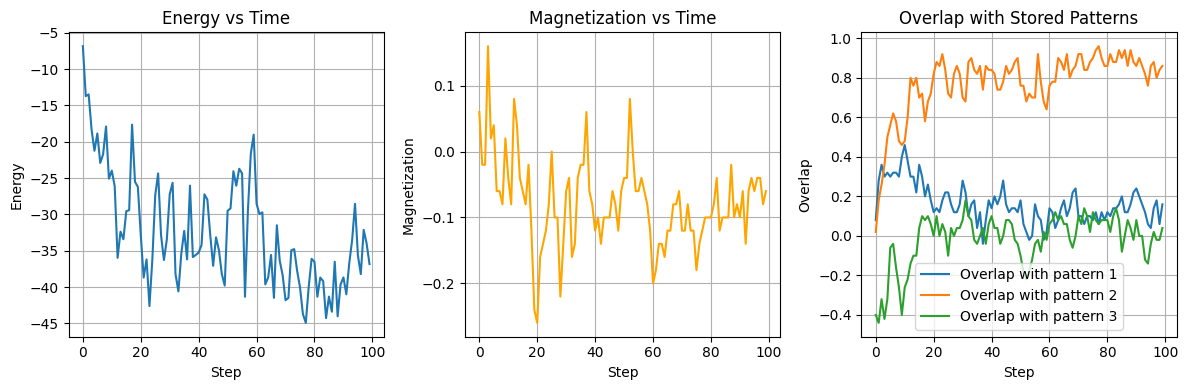

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100             # Number of neurons
p = 3               # Number of patterns
beta = 1.5          # Inverse temperature (β = 1/T)
steps = 100         # Number of update sweeps

# Generate random patterns (each pattern is a binary vector of -1 or 1)
patterns = np.random.choice([-1, 1], size=(p, N))

# Hebbian learning rule (Eq. 1.5)
J = np.zeros((N, N))
for mu in range(p):
    J += np.outer(patterns[mu], patterns[mu])
J /= N
np.fill_diagonal(J, 0)  # Remove self-connections

# Initialize random state
S = np.random.choice([-1, 1], size=N)

# Tracking
energies = []
magnetizations = []
overlaps = []

# Energy function (Eq. 1.3)
def energy(S):
    return -0.5 * S @ J @ S

# Overlap with each stored pattern
def compute_overlaps(S, patterns):
    return [(1/N) * np.dot(S, xi) for xi in patterns]

# Glauber dynamics update (Eq. 2.1)
def glauber_step(S, beta):
    for _ in range(N):
        i = np.random.randint(N)
        h_i = np.dot(J[i], S)
        prob = 1 / (1 + np.exp(-2 * beta * h_i))
        S[i] = 1 if np.random.rand() < prob else -1
    return S

# Simulation loop
for step in range(steps):
    S = glauber_step(S, beta)
    energies.append(energy(S))
    magnetizations.append(np.mean(S))
    overlaps.append(compute_overlaps(S, patterns))

# Convert overlaps to array for easier plotting
overlaps = np.array(overlaps)

# Plotting
plt.figure(figsize=(12, 4))

# Energy plot
plt.subplot(1, 3, 1)
plt.plot(energies, label='Energy')
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title('Energy vs Time')
plt.grid(True)

# Magnetization plot
plt.subplot(1, 3, 2)
plt.plot(magnetizations, label='Magnetization', color='orange')
plt.xlabel('Step')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Time')
plt.grid(True)

# Overlap plot
plt.subplot(1, 3, 3)
for mu in range(p):
    plt.plot(overlaps[:, mu], label=f'Overlap with pattern {mu+1}')
plt.xlabel('Step')
plt.ylabel('Overlap')
plt.title('Overlap with Stored Patterns')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# Glauber Dynamics and Memory Recall in the Generalized Hopfield Model

To analyze the behavior of the generalized Hopfield model at finite temperature, the simulation employs **Glauber dynamics**, a probabilistic update mechanism grounded in equilibrium statistical mechanics. This approach directly implements the stochastic spin-update rule presented in Eq. (2.1) of Amit, Gutfreund, and Sompolinsky’s 1985 paper.

## 1. Model Structure

The model consists of $N$ binary neurons, each taking values $S_i \in \{-1, +1\}$, for $i = 1, \ldots, N$. A set of $p$ memory patterns $\{ \boldsymbol{\xi}^\mu \}_{\mu = 1}^p$, with each pattern comprising $N$ components drawn independently from $\{-1, +1\}$, serves as the content to be stored. Synaptic interactions are defined through the Hebbian learning rule:

$$
J_{ij} = \frac{1}{N} \sum_{\mu=1}^p \xi_i^\mu \xi_j^\mu, \quad \text{with } J_{ii} = 0
\tag{1.5}
$$

The energy landscape of the system is determined by the Hamiltonian:

$$
H(\boldsymbol{S}) = -\frac{1}{2} \sum_{i,j} J_{ij} S_i S_j
\tag{1.3}
$$

This Hamiltonian ensures that the stored patterns correspond to local minima under suitable conditions.

## 2. Probabilistic Dynamics

To account for thermal fluctuations, the system evolves using Glauber dynamics. Each spin $S_i$ is selected randomly and updated according to the Gibbs distribution. The update probability is given by:

$$
P(S_i \rightarrow +1) = \frac{1}{1 + \exp(-2 \beta h_i)}
$$

where the local field experienced by neuron $i$ is defined as:

$$
h_i = \sum_j J_{ij} S_j
$$

This expression is derived directly from the change in energy associated with flipping $S_i$, and follows from the Boltzmann weight $\exp(-\beta \Delta H)$. The parameter $\beta = 1/T$ controls the influence of energy minimization relative to stochasticity: large $\beta$ leads to deterministic updates favoring lower energy, while small $\beta$ introduces higher noise.

Each Glauber sweep consists of $N$ such updates, ensuring that each neuron has an opportunity to change state once on average.

## 3. Memory Recall Evaluation

To assess associative recall, each stored pattern $\boldsymbol{\xi}^\mu$ is corrupted by randomly flipping a specified fraction of its bits. This produces a noisy initial condition $\boldsymbol{\xi}_{\text{noisy}}^\mu$, which is then used as the starting state for the dynamics. After a fixed number of sweeps, the final state $\boldsymbol{S}_{\text{recalled}}^\mu$ is compared to the original.

The fidelity of recall is evaluated using the **Hamming distance**:

$$
d_H(\boldsymbol{A}, \boldsymbol{B}) = \sum_{i=1}^N \frac{1}{2} | A_i - B_i |
$$

This quantity measures the number of differing bits between two patterns. A low Hamming distance between $\boldsymbol{S}_{\text{recalled}}^\mu$ and $\boldsymbol{\xi}^\mu$ indicates successful reconstruction of the memory.

## 4. Empirical Outcomes

By running this process across all stored patterns and repeating the experiment over many trials, aggregate metrics can be computed. These include the average Hamming distance between the original and recalled patterns, and the proportion of exact or near-exact recalls. The results reveal how the model’s ability to denoise inputs varies as a function of parameters such as $\beta$, number of stored patterns $p$, and system size $N$.

This simulation illustrates the principles of statistical learning and associative memory encoded in the Hopfield model, while demonstrating how thermodynamic principles such as the Gibbs distribution govern the dynamics of neural state transitions.


In [1]:
import numpy as np
from scipy.spatial.distance import hamming

# Parameters
N = 100             # Number of neurons
p = 5               # Number of patterns
beta = 2.0          # Inverse temperature
steps = 100         # Number of update sweeps
noise_level = 0.3   # Fraction of bits to flip in noisy input
runs = 100          # Number of full simulations

# Threshold for successful recall (e.g., <= 5 bit errors)
recall_threshold = 5

# Tracking
total_hamming_noisy = 0
total_hamming_recalled = 0
total_successful_recalls = 0
total_patterns = runs * p

# Glauber dynamics update
def glauber_step(S, beta, J):
    for _ in range(N):
        i = np.random.randint(N)
        h_i = np.dot(J[i], S)
        prob = 1 / (1 + np.exp(-2 * beta * h_i))
        S[i] = 1 if np.random.rand() < prob else -1
    return S

# Function to corrupt a pattern
def corrupt_pattern(pattern, noise_level):
    noisy = pattern.copy()
    flip_indices = np.random.choice(N, size=int(noise_level * N), replace=False)
    noisy[flip_indices] *= -1
    return noisy

# Run multiple simulations
for run in range(runs):
    # Generate random patterns
    patterns = np.random.choice([-1, 1], size=(p, N))

    # Hebbian learning rule
    J = np.zeros((N, N))
    for mu in range(p):
        J += np.outer(patterns[mu], patterns[mu])
    J /= N
    np.fill_diagonal(J, 0)

    # For each pattern, test recall
    for i in range(p):
        original = patterns[i]
        noisy = corrupt_pattern(original, noise_level)

        # Run Glauber dynamics
        recalled = noisy.copy()
        for _ in range(steps):
            recalled = glauber_step(recalled, beta, J)

        # Measure Hamming distances
        hamming_noisy = hamming(original, noisy) * N
        hamming_recalled = hamming(original, recalled) * N

        total_hamming_noisy += hamming_noisy
        total_hamming_recalled += hamming_recalled

        if hamming_recalled <= recall_threshold:
            total_successful_recalls += 1

# Reporting results
avg_noisy = total_hamming_noisy / total_patterns
avg_recalled = total_hamming_recalled / total_patterns
recall_accuracy = 100 * total_successful_recalls / total_patterns

print(f"Over {runs} runs × {p} patterns:")
print(f"  Average Hamming(original, noisy):    {avg_noisy:.2f}")
print(f"  Average Hamming(original, recalled): {avg_recalled:.2f}")
print(f"  Successful recalls (≤ {recall_threshold} errors): {total_successful_recalls}/{total_patterns}")
print(f"  Recall accuracy: {recall_accuracy:.2f}%")


Over 100 runs × 5 patterns:
  Average Hamming(original, noisy):    30.00
  Average Hamming(original, recalled): 19.65
  Successful recalls (≤ 5 errors): 219/500
  Recall accuracy: 43.80%


# 3. Relationship to Models of Random Magnets

This section explores the deep and illuminating connection between neural network models—particularly those introduced by Hopfield and Little—and the broader field of disordered magnetic systems in statistical physics. In particular, they focus on **infinite-range spin-glass models**, a class of systems in which each spin interacts with every other spin via couplings that incorporate randomness and frustration.

The Hamiltonian introduced earlier in Equations (1.4) and (1.5), which governs the energy landscape of the Hopfield network, is formally identified as a special instance of an **infinite-range spin-glass model**. In this formulation, every pair of spins $(i, j)$ interacts through a **quenched random exchange** $J_{ij}$, meaning the couplings are fixed (quenched) and chosen from a distribution reflecting the stored memory patterns. This structure captures the essence of long-range disorder and memory retrieval.

Here we contrast with the well-known **Sherrington-Kirkpatrick (SK) model**, which serves as a canonical example of an infinite-range spin glass. In the SK model, each $J_{ij}$ is drawn independently from a Gaussian distribution centered at zero. The randomness in the SK model is uncorrelated and isotropic, leading to a complex energy landscape characterized by a large number of **degenerate ground states**. In the thermodynamic limit $N \to \infty$, the number of metastable configurations grows exponentially, and the system exhibits highly nontrivial **static and dynamic behavior** unlike traditional ferromagnets.

At the opposite end of the spectrum lies a much simpler case: the **Mattis model**, which emerges when only a single pattern is stored (i.e., when $p = 1$ in Equation (1.5)). In this limit, the synaptic couplings become highly structured and can be **"gauged away"**, removing the disorder from the Hamiltonian. Thermodynamically, this transforms the system into a trivial ferromagnet, yielding only two ground states:

$$
\{ S_i \} = \pm \{ \xi_i \}
$$

In these states, every bond $S_i S_j J_{ij}$ is positive, indicating an absence of **frustration**. That is, all interactions can be simultaneously satisfied. The energy landscape is smooth, and retrieval dynamics are straightforward.

The Hopfield model with $p > 1$, however, falls into an **intermediate regime** between these two extremes. In this case, while **a finite fraction of bonds are necessarily frustrated**, the structure of the memory patterns $\{ \xi_i^\mu \}$ introduces correlations among the $J_{ij}$ that give rise to a **less degenerate and more structured broken-symmetry phase** than is seen in the SK model. This suggests that even though the system exhibits frustration, the **correlated disorder** helps stabilize distinct attractors (memories) and prevents complete thermodynamic chaos.

There are closely related models in the literature. One notable example is the **Van Hemmen model** for $p = 2$, which was solved exactly. This model was later generalized by **Provost and Vallee** to handle arbitrary $p$. These mean-field models share structural similarities with the Hopfield model but differ in their assumptions about the distribution and structure of the stored patterns. At the time of this paper's publication, many questions regarding the **detailed organization of metastable states**, as well as the nature of the **mean-field solutions** for arbitrary $p$, remained open. The present paper positions itself as a major contribution toward addressing these questions.

Finally, the section highlights an elegant analogy with the **mean-field theory of random-axis ferromagnets**. In such systems, each spin has a strong **local anisotropy**, defined by a unit vector $\hat{n}_i$, and the coupling between spins is given by the scalar product $J_{ij} \propto \hat{n}_i \cdot \hat{n}_j$. This leads to an effective Ising-like spin glass, where the $J_{ij}$ resemble those in Equation (1.5). However, instead of the binary patterns $\xi_i^\mu \in \{ \pm 1 \}$, the components are drawn from continuous unit vectors. In this framework, the spin-glass-like behavior depends not only on the strength of the couplings but also on the **geometry and statistical distribution** of the orientations $\{ \hat{n}_i \}$. This analogy underscores the broader relevance of the Hopfield-type models, and emphasizes that the **choice of pattern distribution**—whether binary, Gaussian, or vectorial—has profound implications for the system's phase structure and retrieval capabilities.

## 3.1 Summary

This situates the Hopfield and Little models within the rich landscape of spin-glass theory. These neural networks can be understood as specialized instances of infinite-range disordered systems, interpolating between the highly ordered Mattis model and the highly chaotic SK model. The nature of frustration, the structure of quenched disorder, and the symmetries encoded in the memory patterns all influence the complexity of the energy landscape and the stability of stored memories. This synthesis provides a bridge between neuroscience-inspired models and foundational results in statistical physics, revealing deep parallels between learning in neural networks and phase transitions in disordered magnets.


$$
$$